count    100.000000
mean     100.540000
std       29.425963
min       51.000000
25%       72.500000
50%      103.000000
75%      125.500000
max      149.000000
Name: Customers, dtype: float64


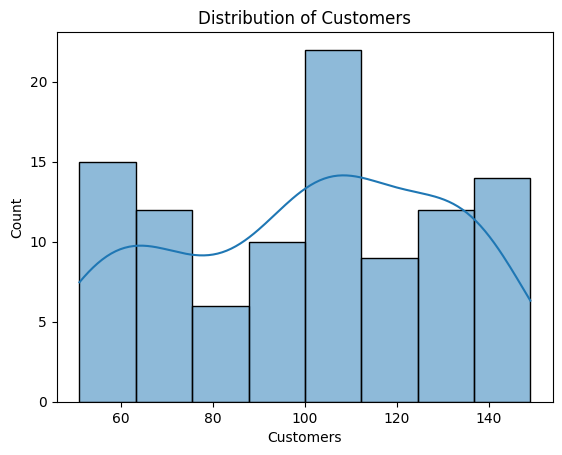

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


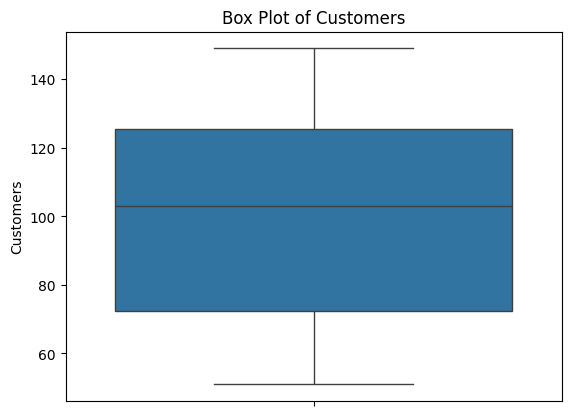

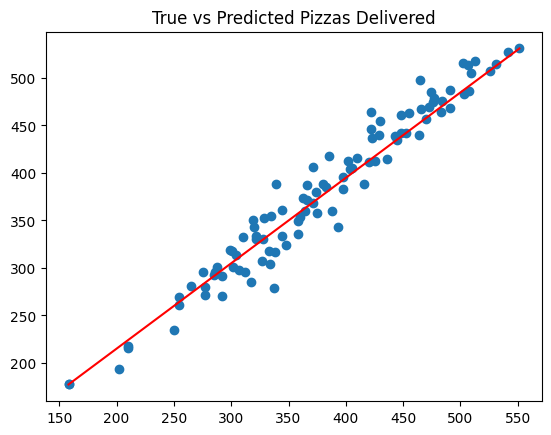

R-squared: 0.9537


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

np.random.seed(42)
n_samples = 100
customers = np.random.randint(50, 150, size=n_samples)
delivery_men = np.random.randint(5, 20, size=n_samples)
pizzas_delivered = 2.5 * customers + 10 * delivery_men + np.random.normal(0, 20, size=n_samples)

data = pd.DataFrame({
    'Customers': customers,
    'Delivery Men': delivery_men,
    'Pizzas Delivered': pizzas_delivered
})

def univariate_analysis(df, feature):
    try:
        if feature not in df.columns: raise KeyError(f"'{feature}' not found.")
        if df[feature].isnull().any(): raise ValueError(f"Missing values in {feature}.")

        print(df[feature].describe())
        sns.histplot(df[feature], kde=True)
        plt.title(f'Distribution of {feature}')
        plt.show()

        sns.boxplot(df[feature])
        plt.title(f'Box Plot of {feature}')
        plt.show()
    except Exception as e:
        print(e)

def train_model(X, y):
    try:
        if X.shape[0] != y.shape[0]: raise ValueError("X and y must have same number of samples.")
        model = LinearRegression().fit(X, y)
        return model
    except Exception as e:
        print(e)

univariate_analysis(data, 'Customers')

X = data[['Customers', 'Delivery Men']]
y = data['Pizzas Delivered']
model = train_model(X, y)

if model:
    try:
        y_pred = model.predict(X)
        plt.scatter(y, y_pred)
        plt.plot([min(y), max(y)], [min(y_pred), max(y_pred)], color='red')
        plt.title('True vs Predicted Pizzas Delivered')
        plt.show()
        print(f"R-squared: {model.score(X, y):.4f}")
    except Exception as e:
        print(e)
